In [1]:
import os
import sys


In [2]:

# === Check for dependencies ===
try:
    from pymatgen.core import Structure
except ImportError:
    print("Error: pymatgen is not installed. Please install it with 'pip install pymatgen'")
    sys.exit(1)


/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))
/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


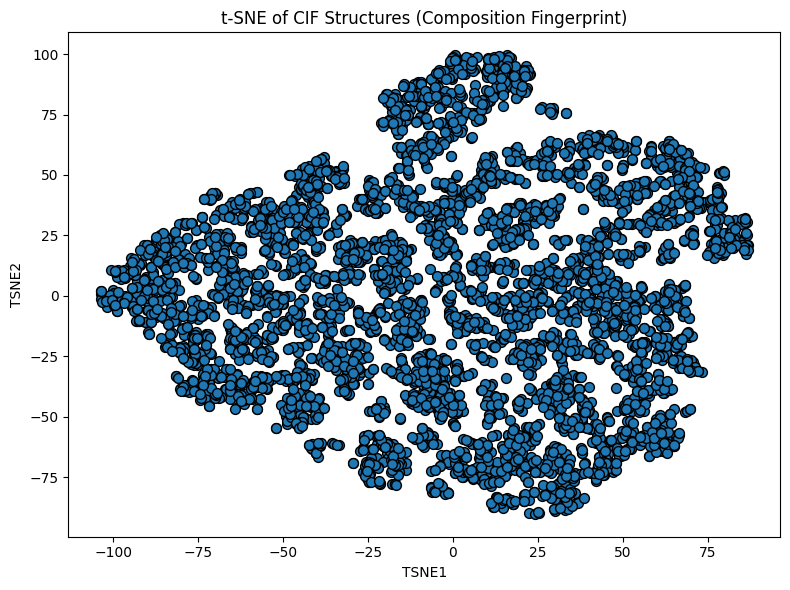

                        Ag   Al   Au    B   Be   Br         C   Ca        Cl  \
qmof-623cc29.cif  0.000000  0.0  0.0  0.0  0.0  0.0  0.425926  0.0  0.000000   
qmof-7b63907.cif  0.000000  0.0  0.0  0.0  0.0  0.0  0.400000  0.0  0.000000   
qmof-6840970.cif  0.000000  0.0  0.0  0.0  0.0  0.0  0.388889  0.0  0.000000   
qmof-9ff30cc.cif  0.033333  0.0  0.0  0.0  0.0  0.0  0.400000  0.0  0.033333   
qmof-6d456c1.cif  0.000000  0.0  0.0  0.0  0.0  0.0  0.322581  0.0  0.064516   

                    F  ...         N   Na         O    P   Pt         S   Se  \
qmof-623cc29.cif  0.0  ...  0.037037  0.0  0.111111  0.0  0.0  0.000000  0.0   
qmof-7b63907.cif  0.0  ...  0.180000  0.0  0.080000  0.0  0.0  0.000000  0.0   
qmof-6840970.cif  0.0  ...  0.000000  0.0  0.222222  0.0  0.0  0.027778  0.0   
qmof-9ff30cc.cif  0.0  ...  0.133333  0.0  0.133333  0.0  0.0  0.000000  0.0   
qmof-6d456c1.cif  0.0  ...  0.129032  0.0  0.000000  0.0  0.0  0.000000  0.0   

                   Si   Ti        Zn  

In [ ]:
cif_folder = './t-SNE'

# === 1. Read CIF files and extract composition-based features ===
structures = []
file_names = []
for fname in os.listdir(cif_folder):
    if fname.lower().endswith('.cif'):
        path = os.path.join(cif_folder, fname)
        struct = Structure.from_file(path)
        structures.append(struct)
        file_names.append(fname)

# Determine all unique elements across structures
all_elements = sorted({el.symbol for struct in structures for el in struct.species})

# Build feature matrix: fraction of each element
data = []
for struct in structures:
    comp = struct.composition
    frac = [comp.get_atomic_fraction(el) for el in all_elements]
    data.append(frac)

df_features = pd.DataFrame(data, columns=all_elements, index=file_names)



/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


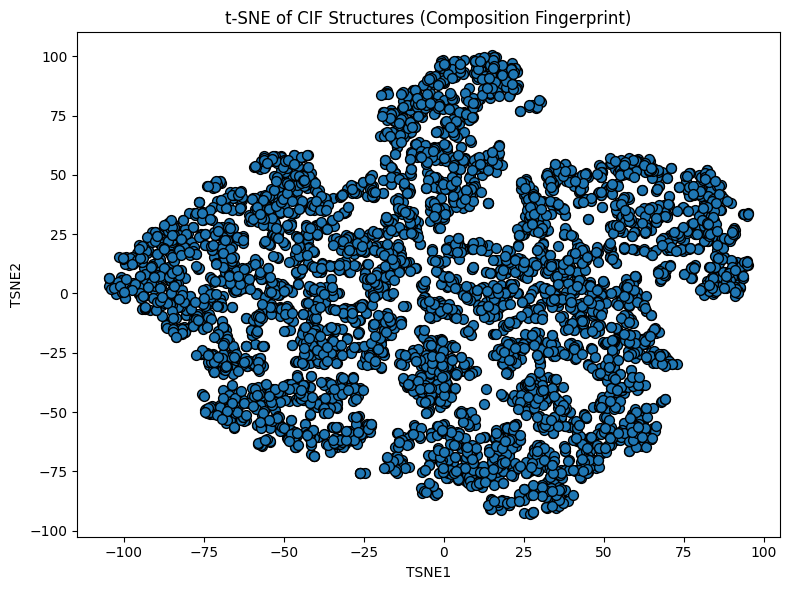

                        Ag   Al   Au    B   Be   Br         C   Ca        Cl  \
qmof-623cc29.cif  0.000000  0.0  0.0  0.0  0.0  0.0  0.425926  0.0  0.000000   
qmof-7b63907.cif  0.000000  0.0  0.0  0.0  0.0  0.0  0.400000  0.0  0.000000   
qmof-6840970.cif  0.000000  0.0  0.0  0.0  0.0  0.0  0.388889  0.0  0.000000   
qmof-9ff30cc.cif  0.033333  0.0  0.0  0.0  0.0  0.0  0.400000  0.0  0.033333   
qmof-6d456c1.cif  0.000000  0.0  0.0  0.0  0.0  0.0  0.322581  0.0  0.064516   

                    F  ...         N   Na         O    P   Pt         S   Se  \
qmof-623cc29.cif  0.0  ...  0.037037  0.0  0.111111  0.0  0.0  0.000000  0.0   
qmof-7b63907.cif  0.0  ...  0.180000  0.0  0.080000  0.0  0.0  0.000000  0.0   
qmof-6840970.cif  0.0  ...  0.000000  0.0  0.222222  0.0  0.0  0.027778  0.0   
qmof-9ff30cc.cif  0.0  ...  0.133333  0.0  0.133333  0.0  0.0  0.000000  0.0   
qmof-6d456c1.cif  0.0  ...  0.129032  0.0  0.000000  0.0  0.0  0.000000  0.0   

                   Si   Ti        Zn  

In [12]:

tsne = TSNE(n_components=2, random_state=9, learning_rate=50, n_iter=5000)
tsne_results = tsne.fit_transform(df_features.values)

df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'], index=file_names)

plt.figure(figsize=(8, 6))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], s=50, edgecolors='k')
plt.title('t-SNE of CIF Structures (Composition Fingerprint)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.tight_layout()
plt.show()

# === Optional: Preview the feature matrix ===
print(df_features.head())


/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))
/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


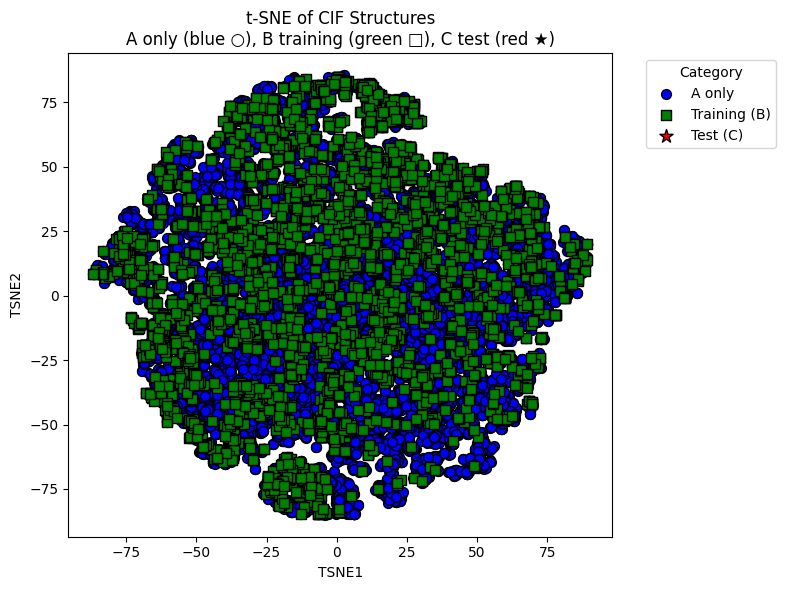

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from pymatgen.core import Structure

# --- User paths ---
folder_A = './relaxed_structures'            # all CIFs
folder_B = './t-SNE'            # training CIFs
csv_file  = './qmof_synthesized_filtered.csv'         # has column "name" listing train+test

# --- 1. Gather filenames ---
files_A = {f for f in os.listdir(folder_A) if f.lower().endswith('.cif')}
files_B = {f for f in os.listdir(folder_B) if f.lower().endswith('.cif')}

df_lbl  = pd.read_csv(csv_file, dtype=str)
csv_set = set(df_lbl['qmof_id'].astype(str))

# --- 2. Define sets for plotting ---
set_B      = files_B
set_C      = csv_set - files_B           # in CSV but not in B → test
set_A_only = files_A - csv_set           # in A but not in CSV → unlabeled

# --- 3. Build feature matrix from A only ---
all_files = sorted(files_A)
structures = [Structure.from_file(os.path.join(folder_A, f)) for f in all_files]

# elemental fractions fingerprint
elements = sorted({el.symbol for s in structures for el in s.species})
data = []
for s in structures:
    comp = s.composition
    data.append([comp.get_atomic_fraction(el) for el in elements])

df_feat = pd.DataFrame(data, index=all_files, columns=elements)

# --- 4. t-SNE ---
tsne = TSNE(n_components=2, random_state=42)
XY   = tsne.fit_transform(df_feat.values)
df_tsne = pd.DataFrame(XY, index=all_files, columns=['TSNE1', 'TSNE2'])

# --- 5. Plot with three markers/colors ---
plt.figure(figsize=(8,6))

# Unlabeled (A_only) → blue circles
mask = df_tsne.index.isin(set_A_only)
plt.scatter(df_tsne.loc[mask,'TSNE1'], df_tsne.loc[mask,'TSNE2'],
            marker='o', color='blue',  label='A only',   s=50, edgecolors='k')

# Training (B) → green squares
mask = df_tsne.index.isin(set_B)
plt.scatter(df_tsne.loc[mask,'TSNE1'], df_tsne.loc[mask,'TSNE2'],
            marker='s', color='green', label='Training (B)', s=50, edgecolors='k')

# Test (C) → red stars
mask = df_tsne.index.isin(set_C)
plt.scatter(df_tsne.loc[mask,'TSNE1'], df_tsne.loc[mask,'TSNE2'],
            marker='*', color='red',   label='Test (C)',    s=100, edgecolors='k')

plt.legend(title='Category', bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('t-SNE of CIF Structures\nA only (blue ○), B training (green □), C test (red ★)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.tight_layout()
plt.show()


In [16]:
# After defining set_A_only, set_B, set_C, and df_tsne:

# 1) Check counts
print("Counts per category:")
print(" A only:", len(set_A_only))
print(" Training (B):", len(set_B))
print(" Test (C):", len(set_C))

# 2) Optionally, list a few members of C to confirm names:
print("\nSample Test (C) filenames:", list(set_C)[:5])

# 3) Then your plotting code with zorder as before


Counts per category:
 A only: 20374
 Training (B): 5151
 Test (C): 5951

Sample Test (C) filenames: ['qmof-fc85ca5', 'qmof-bceb11a', 'qmof-39d42bd', 'qmof-0ffb4d8', 'qmof-932fda1']


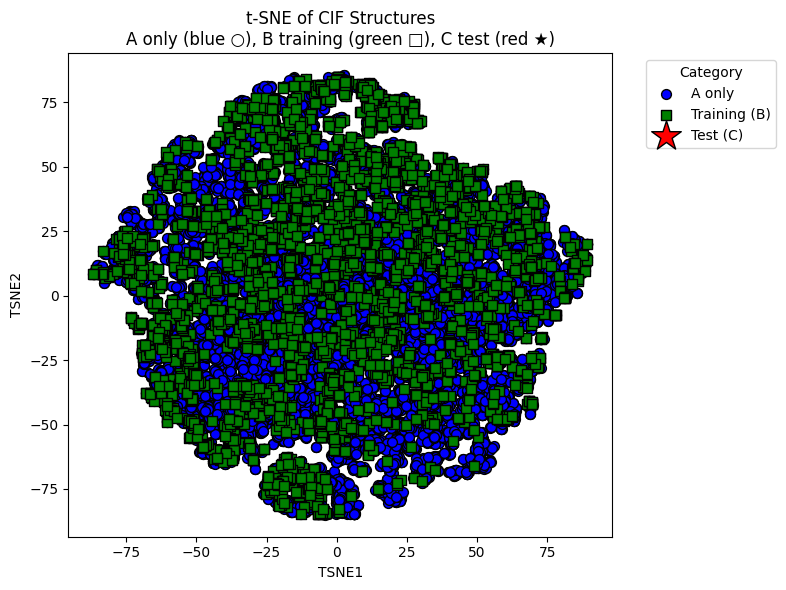

In [17]:
plt.figure(figsize=(8,6))

# A only → blue circles, bottom layer
mask = df_tsne.index.isin(set_A_only)
plt.scatter(df_tsne.loc[mask,'TSNE1'], df_tsne.loc[mask,'TSNE2'],
            marker='o', color='blue',  label='A only',
            s=50, edgecolors='k', zorder=1)

# B training → green squares, middle layer
mask = df_tsne.index.isin(set_B)
plt.scatter(df_tsne.loc[mask,'TSNE1'], df_tsne.loc[mask,'TSNE2'],
            marker='s', color='green', label='Training (B)',
            s=50, edgecolors='k', zorder=2)

# C test → red stars, top layer
mask = df_tsne.index.isin(set_C)
plt.scatter(df_tsne.loc[mask,'TSNE1'], df_tsne.loc[mask,'TSNE2'],
            marker='*', color='red',   label='Test (C)',
            s=500, edgecolors='k', zorder=3)

plt.legend(title='Category', bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('t-SNE of CIF Structures\nA only (blue ○), B training (green □), C test (red ★)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.tight_layout()
plt.show()

In [46]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from pymatgen.core import Structure

In [47]:
folder_A = './relaxed_structures'            # all CIFs
folder_B = './t-SNE'            # training CIFs
csv_file  = './qmof_synthesized_filtered.csv'         # has column "name" listing train+test

In [48]:
# 1. 收集文件名及 stem
files_A = sorted(f for f in os.listdir(folder_A) if f.lower().endswith('.cif'))
files_B = sorted(f for f in os.listdir(folder_B) if f.lower().endswith('.cif'))

stems_A = [os.path.splitext(f)[0] for f in files_A]
stems_B = {os.path.splitext(f)[0] for f in files_B}

df_lbl = pd.read_csv(csv_file, dtype=str)
stems_C_all = set(df_lbl['qmof_id'].astype(str))  # C_csv：train+test 的 stem



In [50]:
# 2. 定义三层集合
set_A = set(stems_A)                         # 全体
set_B = stems_B                              # 训练集
set_C_test = stems_C_all - set_B             # 测试集 = C_csv − B

In [51]:
# 3. 调试输出，确认没有命名不匹配
print("=== 调试信息 ===")
print(f"A (全体) stem 数量   : {len(set_A)}")
print(f"B (训练集) stem 数量 : {len(set_B)}, 与 A 重合：{len(set_B & set_A)}")
print(f"C_total (train+test) : {len(stems_C_all)}")
print(f"C_test stem 数量     : {len(set_C_test)}, 与 A 重合：{len(set_C_test & set_A)}")
print("样例 C_test 名称（前 5 个）：", list(set_C_test)[:5])


=== 调试信息 ===
A (全体) stem 数量   : 20374
B (训练集) stem 数量 : 5151, 与 A 重合：5151
C_total (train+test) : 5951
C_test stem 数量     : 800, 与 A 重合：800
样例 C_test 名称（前 5 个）： ['qmof-42d5f8c', 'qmof-7508c2e', 'qmof-d3a4dfb', 'qmof-7d4712b', 'qmof-27acf12']


In [52]:
structures = [Structure.from_file(os.path.join(folder_A, f)) for f in files_A]
elements   = sorted({el.symbol for s in structures for el in s.species})
data       = [[s.composition.get_atomic_fraction(el) for el in elements] for s in structures]
df_feat    = pd.DataFrame(data, index=stems_A, columns=elements)

/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


In [53]:
df_feat

,Ag,Al,As,Au,B,Ba,Be,Bi,Br,C,...,Ti,Tl,Tm,U,V,W,Y,Yb,Zn,Zr
qmof-0000295,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.280000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
qmof-00019ff,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.049383,0.444444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
qmof-0001b0d,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.477876,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017699,0.0
qmof-0003ae4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
qmof-000512e,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.300000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qmof-fff0df1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.367647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
qmof-fff4e91,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.434783,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.0
qmof-fffa2d9,0.0,0.0,0.0,0.0,0.0,0.035714,0.0,0.0,0.000000,0.214286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
qmof-fffd0e2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.019231,0.423077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,0.0


In [54]:

tsne = TSNE(n_components=2, random_state=9, learning_rate=50, n_iter=5000)
XY = tsne.fit_transform(df_feat.values)
df_tsne = pd.DataFrame(XY, index=stems_A, columns=['TSNE1', 'TSNE2'])


/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


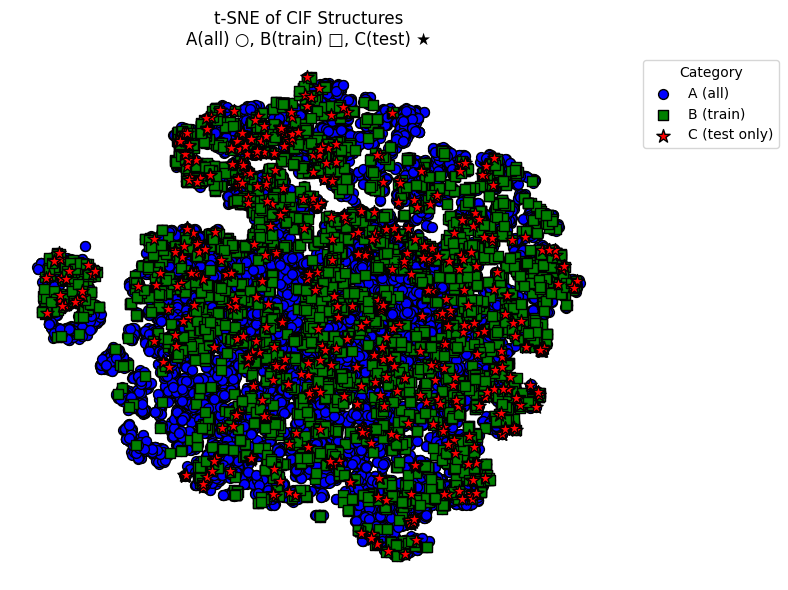

In [59]:

plt.figure(figsize=(8,6))

# Layer A：
mask_A = df_tsne.index.isin(set_A)
plt.scatter(df_tsne.loc[mask_A,'TSNE1'], df_tsne.loc[mask_A,'TSNE2'],
            marker='o', color='blue',  label='A (all)',      s=50, edgecolors='k', zorder=1)

# Layer B
mask_B = df_tsne.index.isin(set_B)
plt.scatter(df_tsne.loc[mask_B,'TSNE1'], df_tsne.loc[mask_B,'TSNE2'],
            marker='s', color='green', label='B (train)',    s=50, edgecolors='k', zorder=2)

# Layer Test
mask_C = df_tsne.index.isin(set_C_test)
plt.scatter(df_tsne.loc[mask_C,'TSNE1'], df_tsne.loc[mask_C,'TSNE2'],
            marker='*', color='red',   label='C (test only)', s=100, edgecolors='k', zorder=3)

plt.legend(title='Category', bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('t-SNE of CIF Structures\nA(all) ○, B(train) □, C(test) ★')
plt.gca().set_xticks([])    # remove x ticks
plt.gca().set_yticks([])    # remove y ticks
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


In [57]:
from matminer.featurizers.structure import DensityFeatures, GlobalSymmetryFeatures

ImportError: cannot import name 'Literal' from 'typing' (/usr/local/Caskroom/miniconda/base/lib/python3.7/typing.py)